In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cic-ids/cleaned_data1.csv')

# Feature Engineering 

In [ ]:
df.replace(to_replace=["Bot", "FTP-BruteForce", "SSH-Bruteforce","DoS attacks-GoldenEye","DoS attacks-Slowloris"], value="Malicious", inplace=True)

In [ ]:
df['Label'].value_counts()

Benign       2426087
Malicious     719638
Name: Label, dtype: int64

In [ ]:
df.replace(to_replace="Benign", value=0, inplace=True)
df.replace(to_replace="Malicious", value=1, inplace=True)

In [ ]:
df['Label'].value_counts()

0    2426087
1     719638
Name: Label, dtype: int64

In [ ]:
df.drop('Bwd URG Flags','Bwd Pkts/b Avg','', axis='columns')

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,112641719,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320859.5,139.300036,56320958,56320761,0,0,0
1,112641466,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320733.0,114.551299,56320814,56320652,0,0,0
2,112638623,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56319311.5,301.934596,56319525,56319098,0,0,0
3,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,...,0.0,0,0,0.0,0.000000,0,0,0,0,1
4,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,...,0.0,0,0,0.0,0.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145720,3982183,14,8,1442,1731,725,0,103.000000,191.125412,1179,...,0.0,0,0,0.0,0.000000,0,0,0,0,1
3145721,3802316,14,8,1440,1731,725,0,102.857143,191.172841,1179,...,0.0,0,0,0.0,0.000000,0,0,0,0,1
3145722,4004239,14,8,1459,1731,741,0,104.214286,195.113450,1179,...,0.0,0,0,0.0,0.000000,0,0,0,0,1
3145723,3998435,14,8,1459,1731,741,0,104.214286,195.113450,1179,...,0.0,0,0,0.0,0.000000,0,0,0,0,1


# Label Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

In [ ]:
df['Label'] = LabelEncoder.fit_transform(df['Label'])

# Scaling

In [ ]:
y = df['Label']
X = df.drop(['Label'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Build a model


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(
    criterion='gini',
    splitter='best'
)



In [ ]:
clf.fit(X=x_train, y=y_train)

DecisionTreeClassifier()

Predict on Test Set

In [ ]:
predict = clf.predict(x_test)
predict

array([0, 0, 0, ..., 1, 1, 0])

Confusion Matrix

In [ ]:
conf = confusion_matrix(y_test,predict)
print(conf)

[[485154     11]
 [     7 143973]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


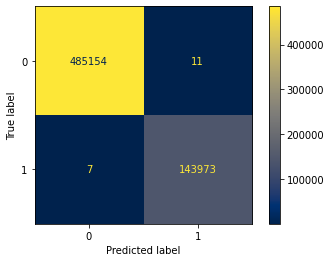

In [ ]:
plot_confusion_matrix(clf, x_test, y_test, cmap="cividis")

Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy score: {}".format(accuracy_score(y_test,predict)))

Accuracy score: 0.999971389743223


Classification Report

In [ ]:
print("Classification Report {}".format(classification_report(y_test,predict,digits=5)))


Classification Report               precision    recall  f1-score   support

           0    0.99999   0.99998   0.99998    485165
           1    0.99992   0.99995   0.99994    143980

    accuracy                        0.99997    629145
   macro avg    0.99995   0.99996   0.99996    629145
weighted avg    0.99997   0.99997   0.99997    629145



Recall Score

In [ ]:
from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_test,predict)))

Recall score: 0.9999513821364079


Saving Model

In [ ]:
import pickle

with open('/content/drive/MyDrive/TrainedModels/decisiontTree.pkl', 'wb') as f:
  pickle.dump(clf, f)